In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import os 
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import functions as fn

/home/phaxssi/miniconda3/envs/rag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Threshold plots

## 1.1. EM (Jaccard)

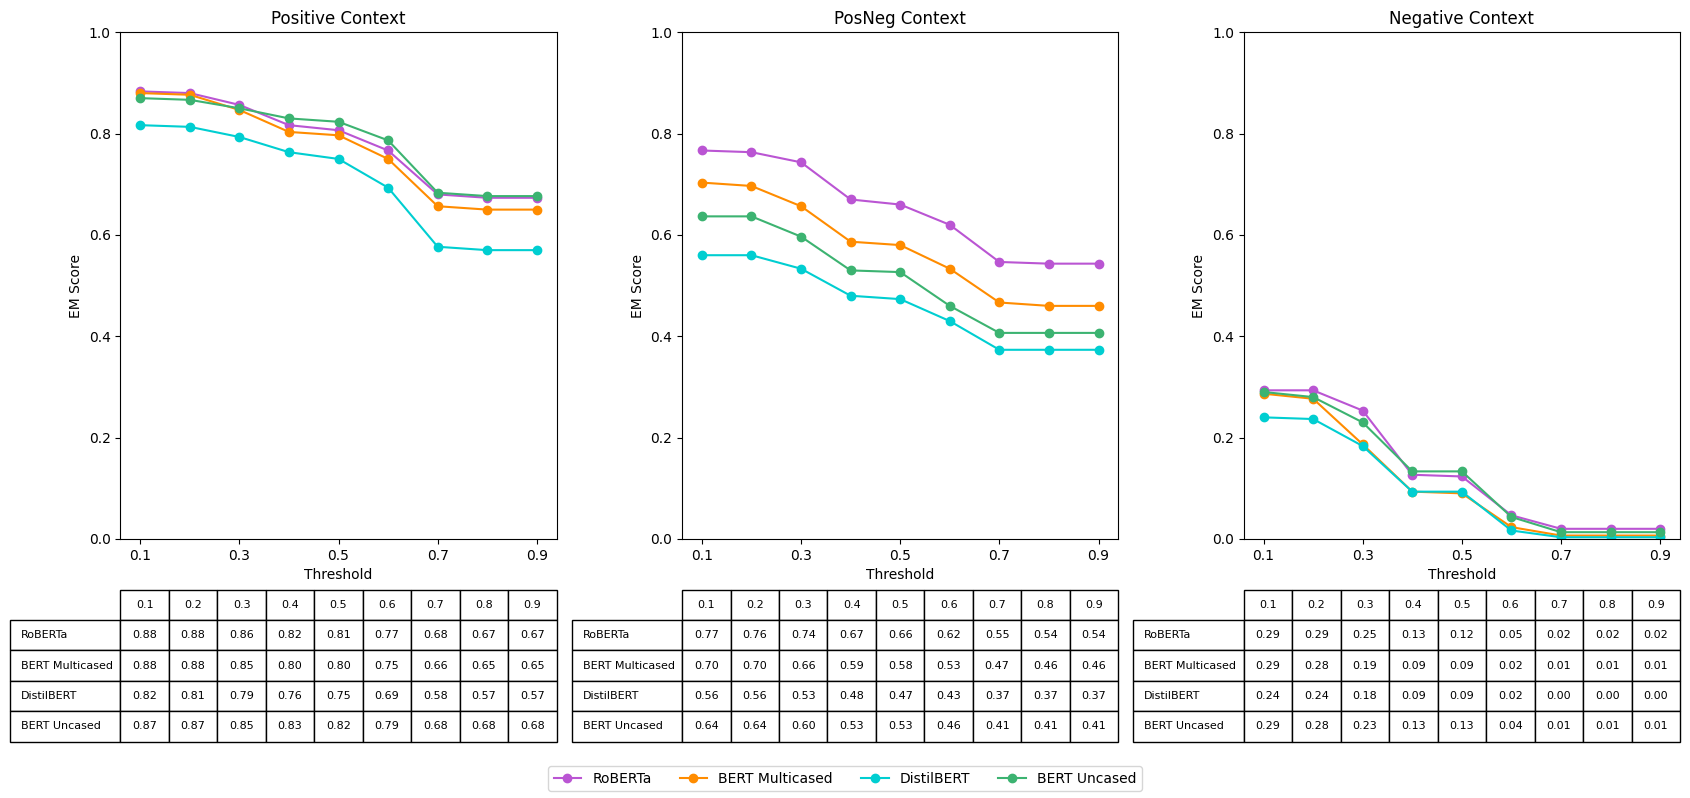

In [59]:
# Definir el directorio que contiene los archivos Excel
directory = 'results/'

# Obtener todos los archivos Excel en el directorio
files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]

# Leer los archivos Excel y almacenarlos en un diccionario
dataframes = {os.path.splitext(f)[0]: pd.read_excel(os.path.join(directory, f)) for f in files}

# Definir los thresholds
thresholds = np.arange(0.1, 1, 0.1)

# Función para calcular el accuracy basado en el threshold
def calculate_accuracy(jaccard_values, threshold):
    return np.mean(jaccard_values >= threshold)

# Calcular el accuracy para cada tipo de Jaccard y cada threshold
def calculate_accuracies(df, context):
    return [calculate_accuracy(df[f'Jaccard {context}'], t) for t in thresholds]

# Inicializar diccionarios para almacenar los resultados
accuracy_positive = {}
accuracy_posneg = {}
accuracy_negative = {}

# Calcular las accuracies para cada archivo
for name, df in dataframes.items():
    accuracy_positive[name] = calculate_accuracies(df, 'Positive')
    accuracy_posneg[name] = calculate_accuracies(df, 'PosNeg')
    accuracy_negative[name] = calculate_accuracies(df, 'Negative')

# Crear los subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 8), sharex=True)

# Definir los colores para cada modelo
colors = ['mediumorchid', 'darkorange', 'darkturquoise', 'mediumseagreen']

# Definir los límites del eje y para que sean iguales en todos los subplots
y_min = 0
y_max = 1

# Subplot para contexto positivo
for name, color in zip(accuracy_positive.keys(), colors):
    axes[0].plot(thresholds, accuracy_positive[name], marker='o', label=name, color=color)
axes[0].set_title('Positive Context')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('EM Score')
axes[0].set_ylim(y_min, y_max)

# Añadir la tabla para el contexto positivo
table_data = [[f"{value:.2f}" for value in accuracy_positive[name]] for name in accuracy_positive.keys()]
table = axes[0].table(cellText=table_data, rowLabels=list(accuracy_positive.keys()), colLabels=[f"{t:.1f}" for t in thresholds], loc='bottom', cellLoc='center', bbox=[0.0, -0.4, 1.0, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

# Subplot para contexto PosNeg
for name, color in zip(accuracy_posneg.keys(), colors):
    axes[1].plot(thresholds, accuracy_posneg[name], marker='o', label=name, color=color)
axes[1].set_title('PosNeg Context')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('EM Score')
axes[1].set_ylim(y_min, y_max)

# Añadir la tabla para el contexto PosNeg
table_data = [[f"{value:.2f}" for value in accuracy_posneg[name]] for name in accuracy_posneg.keys()]
table = axes[1].table(cellText=table_data, rowLabels=list(accuracy_posneg.keys()), colLabels=[f"{t:.1f}" for t in thresholds], loc='bottom', cellLoc='center', bbox=[0.0, -0.4, 1.0, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

# Subplot para contexto negativo
for name, color in zip(accuracy_negative.keys(), colors):
    axes[2].plot(thresholds, accuracy_negative[name], marker='o', label=name, color=color)
axes[2].set_title('Negative Context')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('EM Score')
axes[2].set_ylim(y_min, y_max)

# Añadir la tabla para el contexto negativo
table_data = [[f"{value:.2f}" for value in accuracy_negative[name]] for name in accuracy_negative.keys()]
table = axes[2].table(cellText=table_data, rowLabels=list(accuracy_negative.keys()), colLabels=[f"{t:.1f}" for t in thresholds], loc='bottom', cellLoc='center', bbox=[0.0, -0.4, 1.0, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.xticks(ticks=np.arange(0.1, 1.0, 0.2))
plt.tight_layout()

# Crear una sola leyenda para todos los subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(handles))

# Ajustar los márgenes para dar espacio a las tablas y la leyenda
plt.subplots_adjust(bottom=0.32)

# Guardar y mostrar el gráfico
plt.savefig('plots/em_threshold_jaccard.png', bbox_inches='tight')
plt.show()

## 1.2. EM (Jaccard)

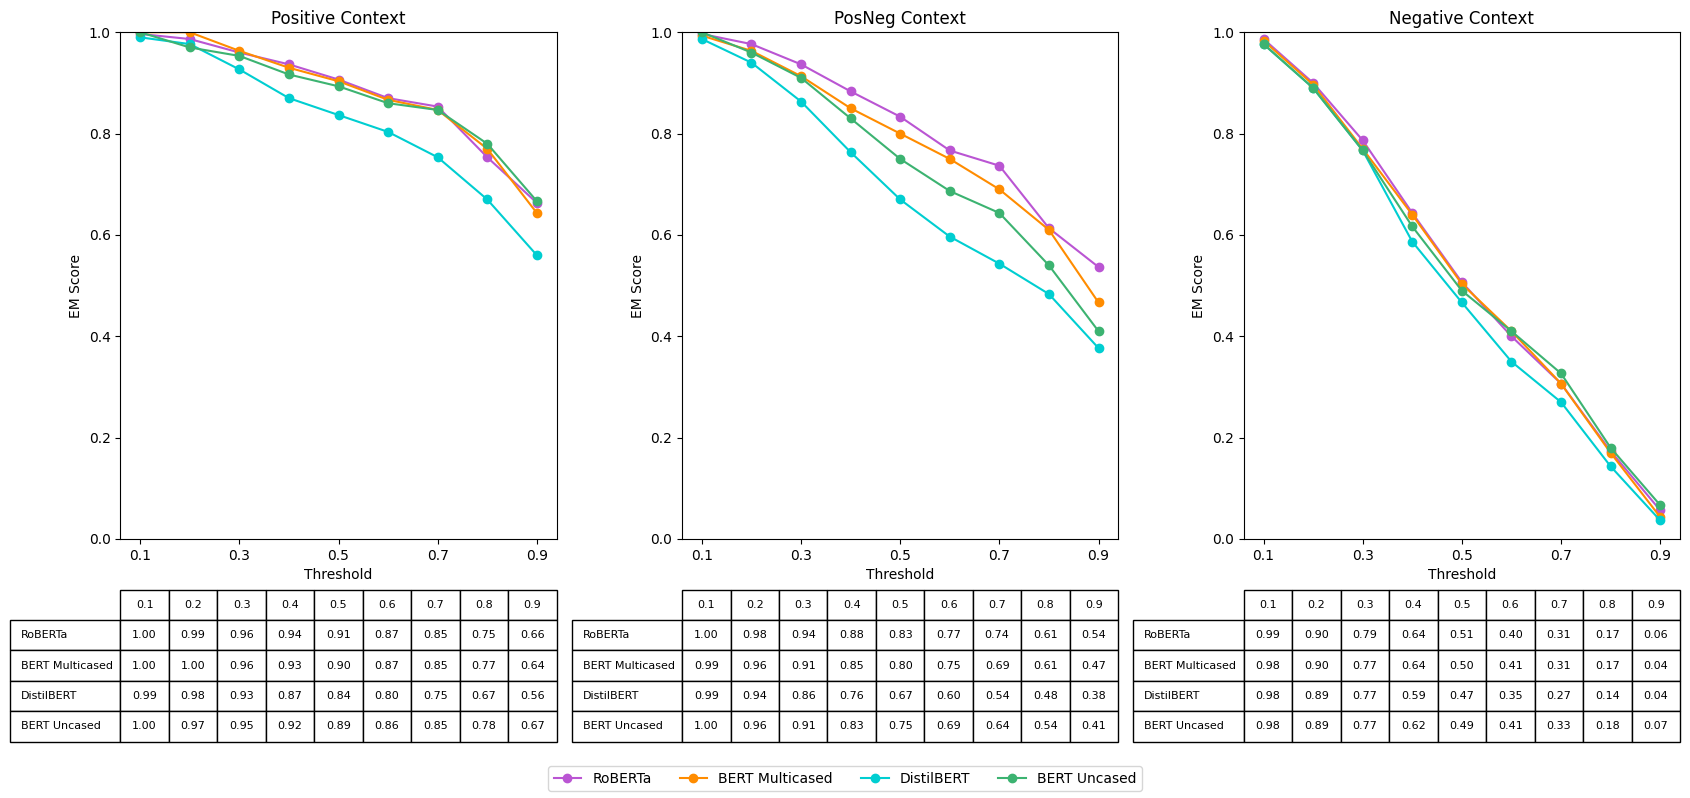

In [55]:
# Definir el directorio que contiene los archivos Excel
directory = 'results/'

# Obtener todos los archivos Excel en el directorio
files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]

# Leer los archivos Excel y almacenarlos en un diccionario
dataframes = {os.path.splitext(f)[0]: pd.read_excel(os.path.join(directory, f)) for f in files}

# Definir los thresholds
thresholds = np.arange(0.1, 1, 0.1)

# Función para calcular el accuracy basado en el threshold
def calculate_accuracy(cosine_values, threshold):
    return np.mean(cosine_values >= threshold)

# Calcular el accuracy para cada tipo de Jaccard y cada threshold
def calculate_accuracies(df, context):
    return [calculate_accuracy(df[f'Cosine {context}'], t) for t in thresholds]

# Inicializar diccionarios para almacenar los resultados
accuracy_positive = {}
accuracy_posneg = {}
accuracy_negative = {}

# Calcular las accuracies para cada archivo
for name, df in dataframes.items():
    accuracy_positive[name] = calculate_accuracies(df, 'Positive')
    accuracy_posneg[name] = calculate_accuracies(df, 'PosNeg')
    accuracy_negative[name] = calculate_accuracies(df, 'Negative')

# Crear los subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 8), sharex=True)

# Definir los colores para cada modelo
colors = ['mediumorchid', 'darkorange', 'darkturquoise', 'mediumseagreen']

# Definir los límites del eje y para que sean iguales en todos los subplots
y_min = 0
y_max = 1

# Subplot para contexto positivo
for name, color in zip(accuracy_positive.keys(), colors):
    axes[0].plot(thresholds, accuracy_positive[name], marker='o', label=name, color=color)
axes[0].set_title('Positive Context')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('EM Score')
axes[0].set_ylim(y_min, y_max)

# Añadir la tabla para el contexto positivo
table_data = [[f"{value:.2f}" for value in accuracy_positive[name]] for name in accuracy_positive.keys()]
table = axes[0].table(cellText=table_data, rowLabels=list(accuracy_positive.keys()), colLabels=[f"{t:.1f}" for t in thresholds], loc='bottom', cellLoc='center', bbox=[0.0, -0.4, 1.0, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

# Subplot para contexto PosNeg
for name, color in zip(accuracy_posneg.keys(), colors):
    axes[1].plot(thresholds, accuracy_posneg[name], marker='o', label=name, color=color)
axes[1].set_title('PosNeg Context')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('EM Score')
axes[1].set_ylim(y_min, y_max)

# Añadir la tabla para el contexto PosNeg
table_data = [[f"{value:.2f}" for value in accuracy_posneg[name]] for name in accuracy_posneg.keys()]
table = axes[1].table(cellText=table_data, rowLabels=list(accuracy_posneg.keys()), colLabels=[f"{t:.1f}" for t in thresholds], loc='bottom', cellLoc='center', bbox=[0.0, -0.4, 1.0, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

# Subplot para contexto negativo
for name, color in zip(accuracy_negative.keys(), colors):
    axes[2].plot(thresholds, accuracy_negative[name], marker='o', label=name, color=color)
axes[2].set_title('Negative Context')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('EM Score')
axes[2].set_ylim(y_min, y_max)

# Añadir la tabla para el contexto negativo
table_data = [[f"{value:.2f}" for value in accuracy_negative[name]] for name in accuracy_negative.keys()]
table = axes[2].table(cellText=table_data, rowLabels=list(accuracy_negative.keys()), colLabels=[f"{t:.1f}" for t in thresholds], loc='bottom', cellLoc='center', bbox=[0.0, -0.4, 1.0, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.xticks(ticks=np.arange(0.1, 1.0, 0.2))
plt.tight_layout()

# Crear una sola leyenda para todos los subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(handles))

# Ajustar los márgenes para dar espacio a las tablas y la leyenda
plt.subplots_adjust(bottom=0.32)

# Guardar y mostrar el gráfico
plt.savefig('plots/em_threshold_cosine.png', bbox_inches='tight')
plt.show()


# 2. Density Plots

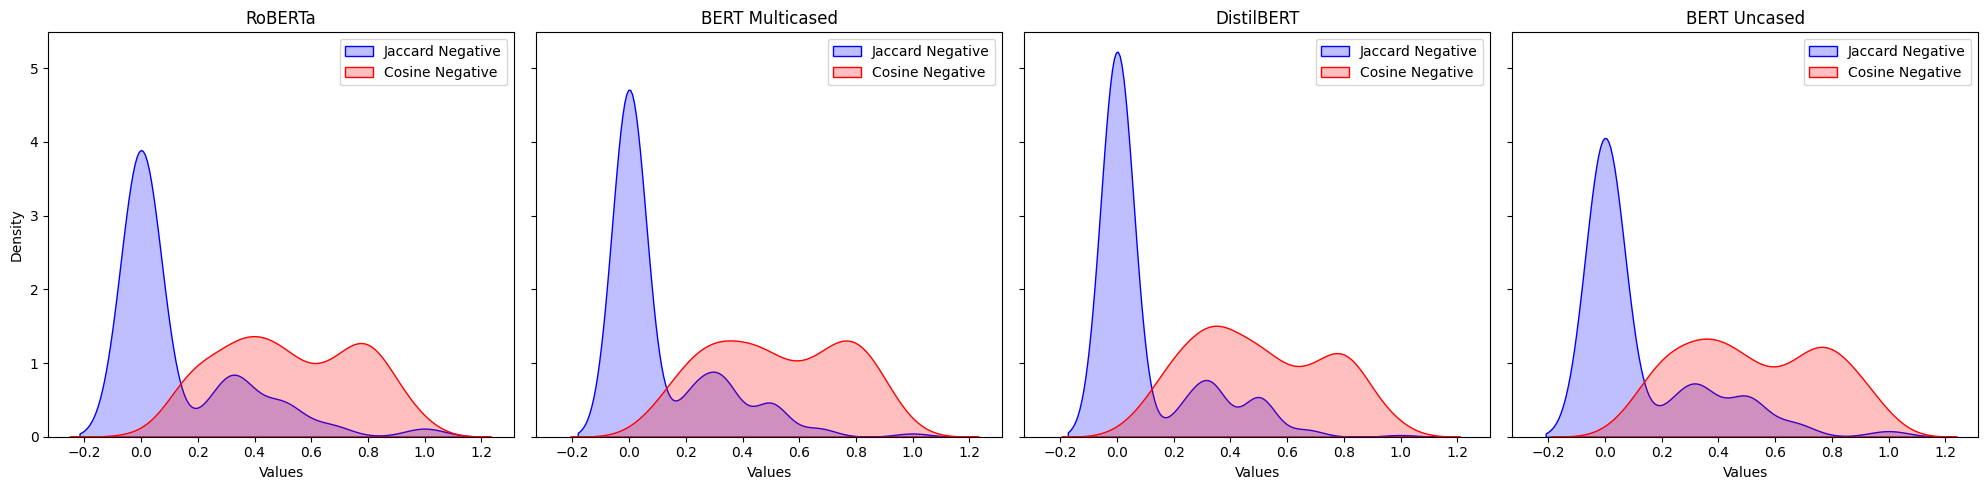

In [17]:

# Definir el directorio que contiene los archivos Excel
directory = 'results/'

# Obtener todos los archivos Excel en el directorio
files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]

# Leer los archivos Excel y almacenarlos en un diccionario
dataframes = {os.path.splitext(f)[0]: pd.read_excel(os.path.join(directory, f)) for f in files}

# Definir las columnas a comparar
column1 = 'Jaccard Negative'  # Cambia esto por el nombre real de la primera columna
column2 = 'Cosine Negative'  # Cambia esto por el nombre real de la segunda columna

# Crear los subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# Iterar sobre los dataframes y crear los gráficos de distribución
for ax, (name, df) in zip(axes, dataframes.items()):
    sns.kdeplot(df[column1], ax=ax, label=column1, fill=True, color='blue')
    sns.kdeplot(df[column2], ax=ax, label=column2, fill=True, color='red')
    ax.set_title(name)
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')
    # ax.set_xlim(0, 1)  # Asegurar Kque el eje horizontal esté en la escala de 0 a 1
    ax.legend()

plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('plots/density_comparison.png', bbox_inches='tight')
plt.show()

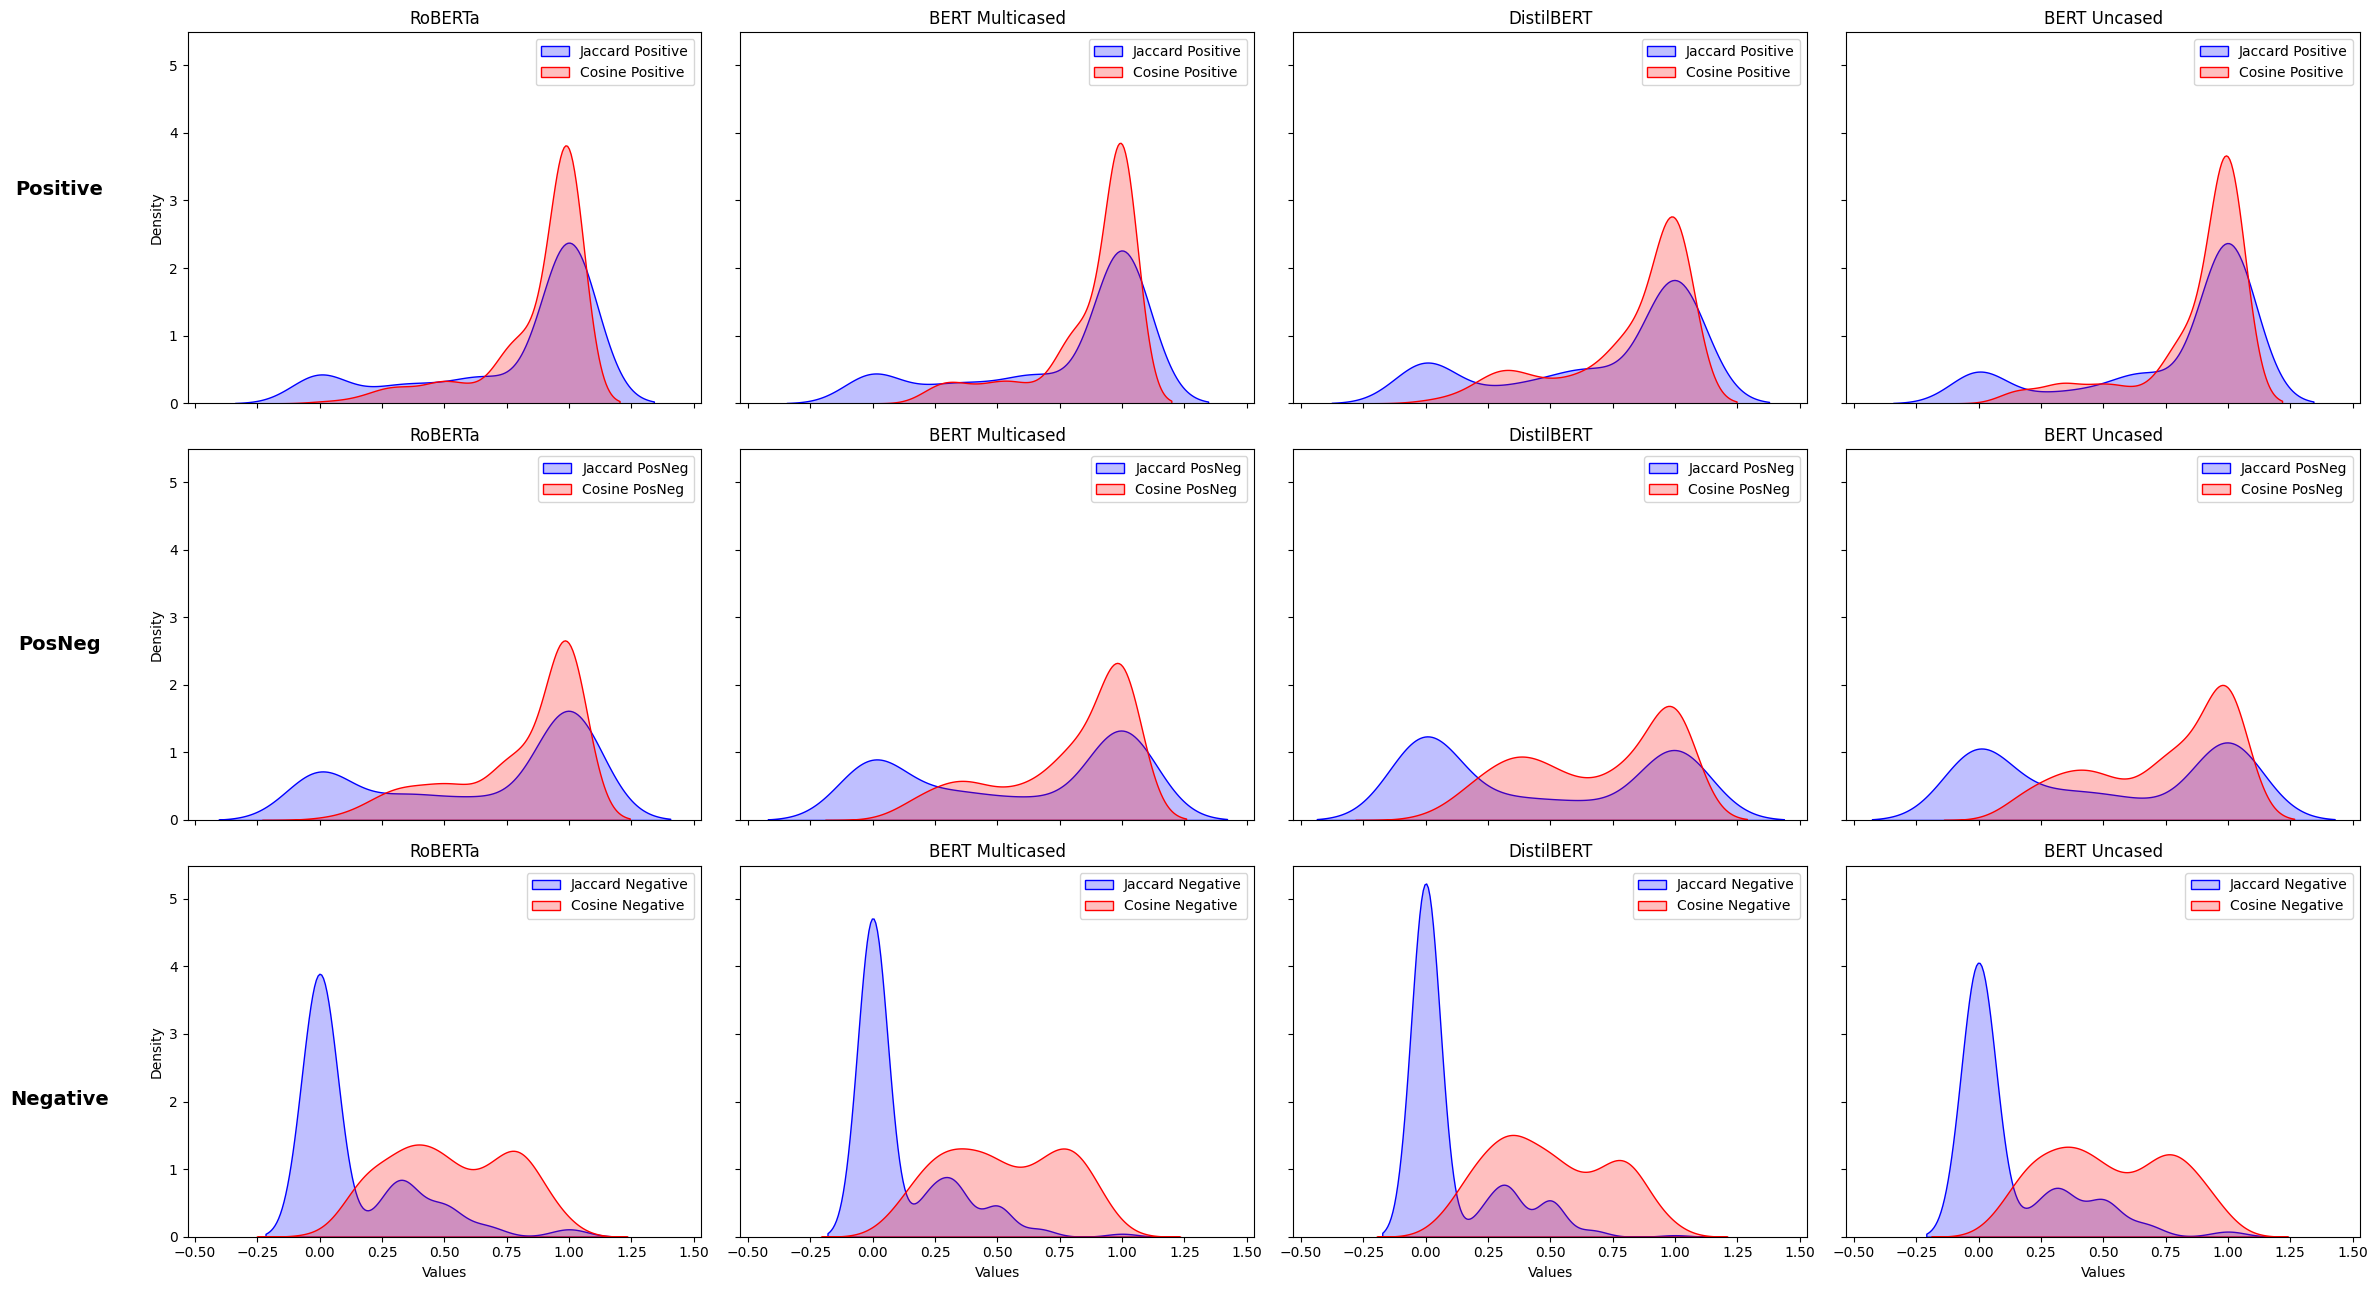

In [30]:
# Definir el directorio que contiene los archivos Excel
directory = 'results/'

# Obtener todos los archivos Excel en el directorio
files = [f for f in os.listdir(directory) if f.endswith('.xlsx')]

# Leer los archivos Excel y almacenarlos en un diccionario
dataframes = {os.path.splitext(f)[0]: pd.read_excel(os.path.join(directory, f)) for f in files}

# Definir las columnas a comparar
columns = {
    'Positive': ('Jaccard Positive', 'Cosine Positive'),
    'PosNeg': ('Jaccard PosNeg', 'Cosine PosNeg'),
    'Negative': ('Jaccard Negative', 'Cosine Negative')
}

# Crear los subplots
fig, axes = plt.subplots(3, 4, figsize=(25, 13), sharex=True, sharey=True)

# Iterar sobre los contextos y los dataframes para crear los gráficos de distribución
for (context, (column1, column2)), row_axes in zip(columns.items(), axes):
    for ax, (name, df) in zip(row_axes, dataframes.items()):
        sns.kdeplot(df[column1], ax=ax, label=column1, fill=True, color='blue')
        sns.kdeplot(df[column2], ax=ax, label=column2, fill=True, color='red')
        ax.set_title(f'{name}')
        ax.set_xlabel('Values')
        ax.set_ylabel('Density')
        # ax.set_xlim(0, 1)  # Asegurar que el eje horizontal esté en la escala de 0 a 1
        ax.legend()

# Añadir etiquetas a la izquierda de cada fila
fig.text(0.07, 0.85, 'Positive', va='center', ha='center', rotation=0, fontsize=14, fontweight='bold')
fig.text(0.07, 0.5, 'PosNeg', va='center', ha='center', rotation=0, fontsize=14, fontweight='bold')
fig.text(0.07, 0.15, 'Negative', va='center', ha='center', rotation=0, fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0.1, 0, 1, 1])  # Ajustar el diseño para dar espacio a las etiquetas

# Guardar y mostrar el gráfico
plt.savefig('plots/density_comparison.png', bbox_inches='tight')
plt.show()